In [9]:
import myloaders
import myitems
import importlib
import matplotlib.pyplot as plt

# importlib.reload(myloaders)
# importlib.reload(myitems)
from myloaders import ItemLoader

In [ ]:
items = ItemLoader("Appliances").load()

In [ ]:
item = items[2007]
print(item)
print(item.category)


In [ ]:
dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments"
]

items = []

for name in dataset_names:
    loader = ItemLoader(name)
    items.extend(loader.load())

In [7]:
print(f"A grand total of {len(items):,} items")

A grand total of 2,751,837 items


In [8]:
token_counts = [item.token_count for item in items]
print(len(token_counts))

2751837


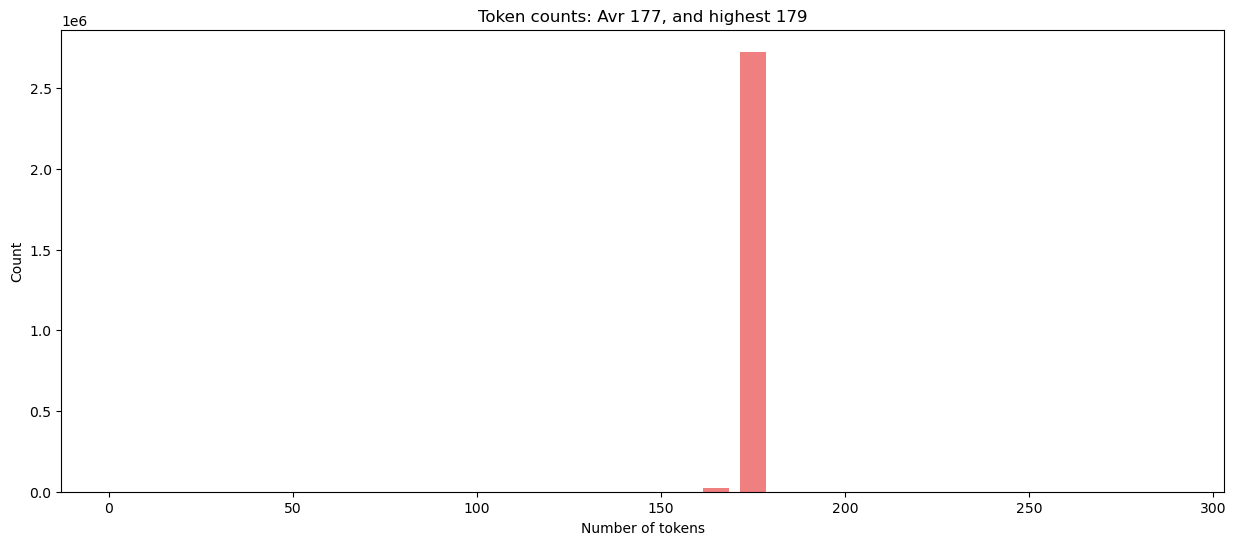

In [12]:
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avr {sum(token_counts)/len(token_counts):,.0f}, and highest {max(token_counts)}")
plt.xlabel("Number of tokens")
plt.ylabel("Count")
plt.hist(token_counts, rwidth=0.7, color="lightcoral", bins=range(0, 300, 10))
plt.show()

In [17]:
prices = [item.price for item in items if item.price < 1000]

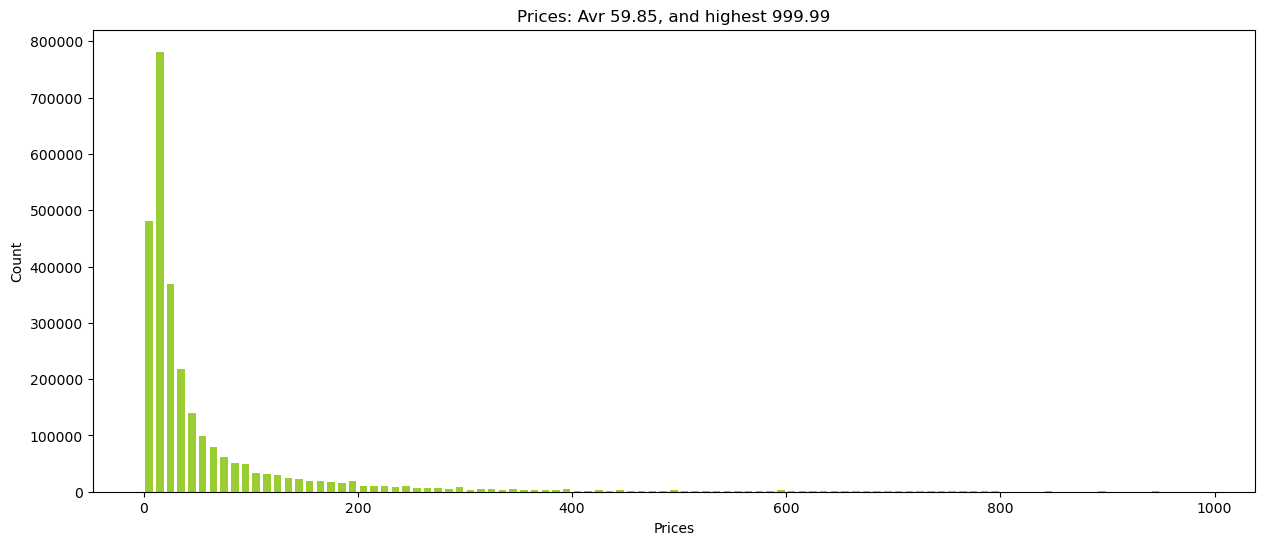

In [18]:
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avr {sum(prices)/len(prices):,.2f}, and highest {max(prices):,}")
plt.xlabel("Prices")
plt.ylabel("Count")
plt.hist(prices, rwidth=0.7, color="yellowgreen", bins=range(0, 1000, 10))
plt.show()

In [19]:
items_limit_price = [item for item in items if item.price < 1000]

In [27]:
categories = list(set(item.category for item in items_limit_price))
print(categories)

['Musical_Instruments', 'Electronics', 'Automotive', 'Tools_and_Home_Improvement', 'Cell_Phones_and_Accessories', 'Appliances', 'Office_Products', 'Toys_and_Games']


In [46]:
from collections import Counter, defaultdict

In [35]:
item_category_counter = Counter(item.category for item in items_limit_price)
categories = item_category_counter.keys()
counts = [item_category_counter[category] for category in categories]

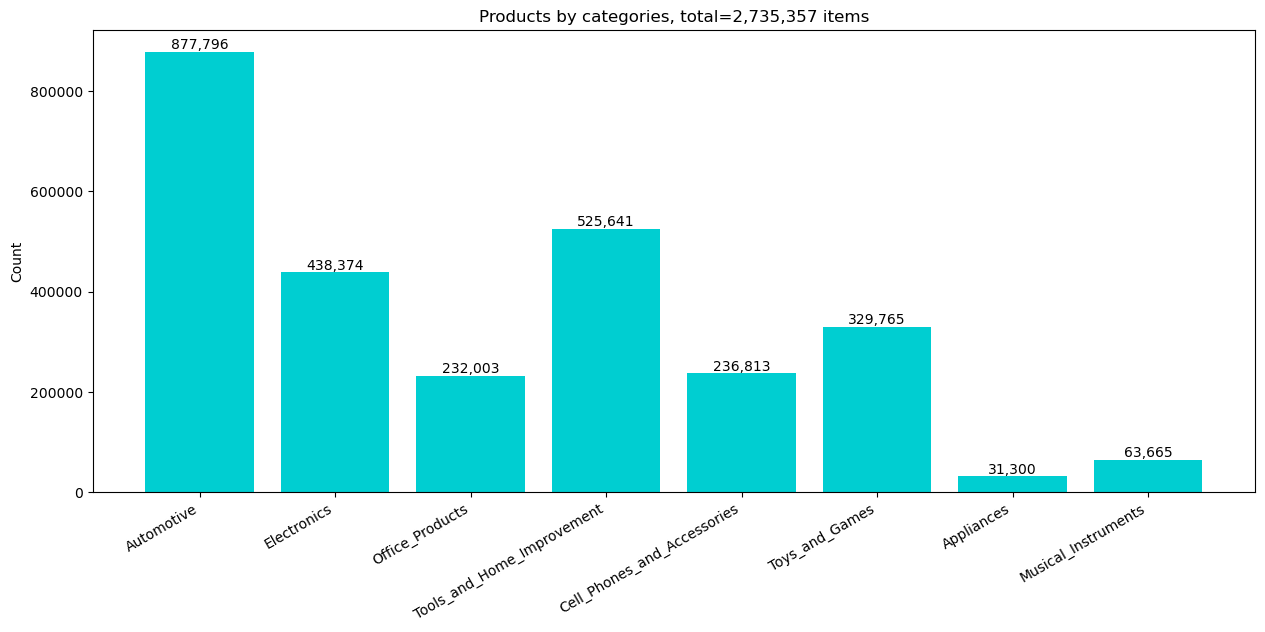

In [44]:
plt.figure(figsize=(15, 6))
plt.title(f"Products by categories, total={len(items_limit_price):,} items")
plt.ylabel("Count")
plt.bar(categories, counts, color="darkturquoise")

plt.xticks(rotation=30, ha='right')

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

In [48]:
slots = defaultdict(list)
for item in items_limit_price:
    slots[round(item.price)].append(item)

In [59]:
slot_keys = slots.keys()
counts = [len(slots[key]) for key in slot_keys]

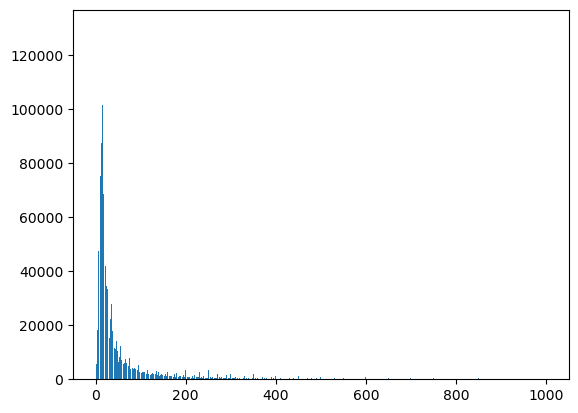

In [61]:
plt.bar(slot_keys, counts)
plt.show()

In [63]:
import numpy as np
import random

In [67]:
np.random.seed(37)
random.seed(37)
sample = []

for i in range(1, 1000):
    slot = slots[i]
    if i >= 240:
        sample.extend(slot)
    elif len(slot) <= 1200:
        sample.extend(slot)
    else:
        weights = np.array([1 if item.category=='Automotive' else 5 for item in slot])
        weights = weights / np.sum(weights)
        selected_indices = np.random.choice(len(slot), size=1200, replace=False, p=weights)
        selected = [slot[j] for j in selected_indices]
        sample.extend(selected)

In [68]:
print(f"There are {len(sample):,} items in sample.")

There are 403,694 items in sample.


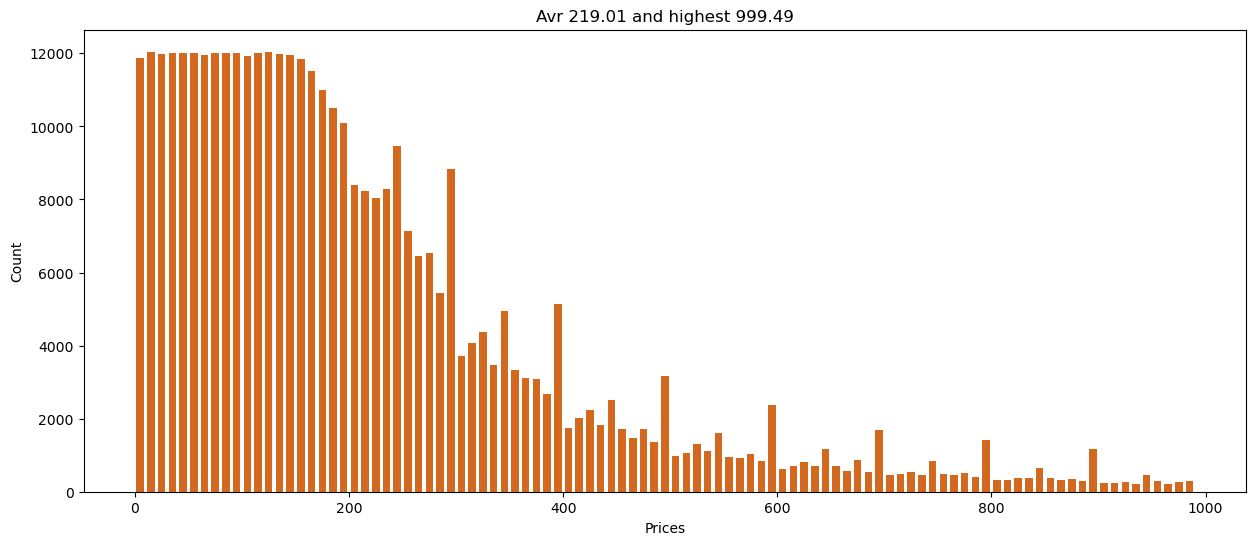

In [72]:
prices = [item.price for item in sample]
plt.figure(figsize=(15, 6))
plt.title(f"Avr {sum(prices)/len(prices):,.2f} and highest {max(prices):,.2f}")
plt.xlabel("Prices")
plt.ylabel("Count")
plt.hist(prices, rwidth=0.7, color='chocolate', bins=range(0, 1000, 10))
plt.show()


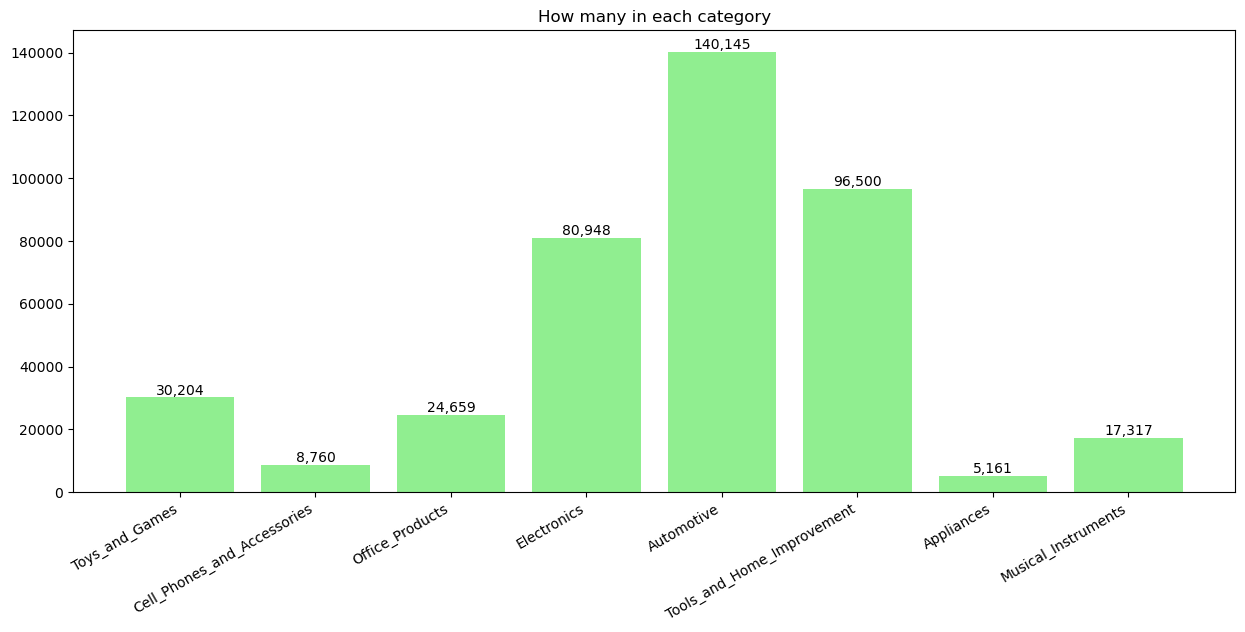

In [76]:
category_count = Counter()
for item in sample:
    category_count[item.category] += 1

categories = category_count.keys()
counts = [category_count[c] for c in categories]

plt.figure(figsize=(15,6))
plt.title("How many in each category")
plt.bar(categories, counts, color='lightgreen')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

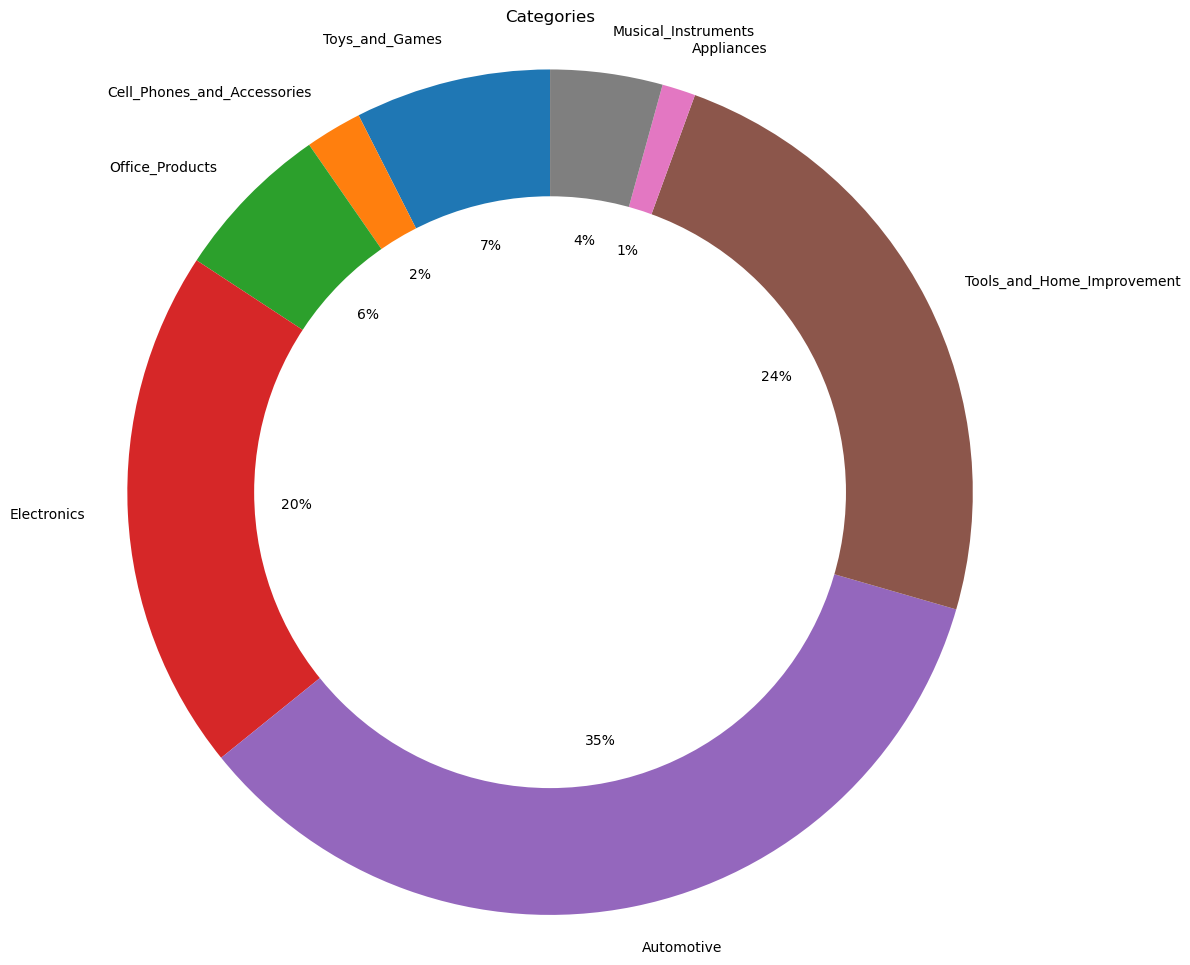

In [86]:
plt.figure(figsize=(12,12))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

centre_circle = plt.Circle((0,0), 0.70, fc="white")
centre_circle2 = plt.Circle((0.5,0), 0.30, fc="lavenderblush")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# fig.gca().add_artist(centre_circle2)

plt.title("Categories")
plt.axis('equal')

plt.show()

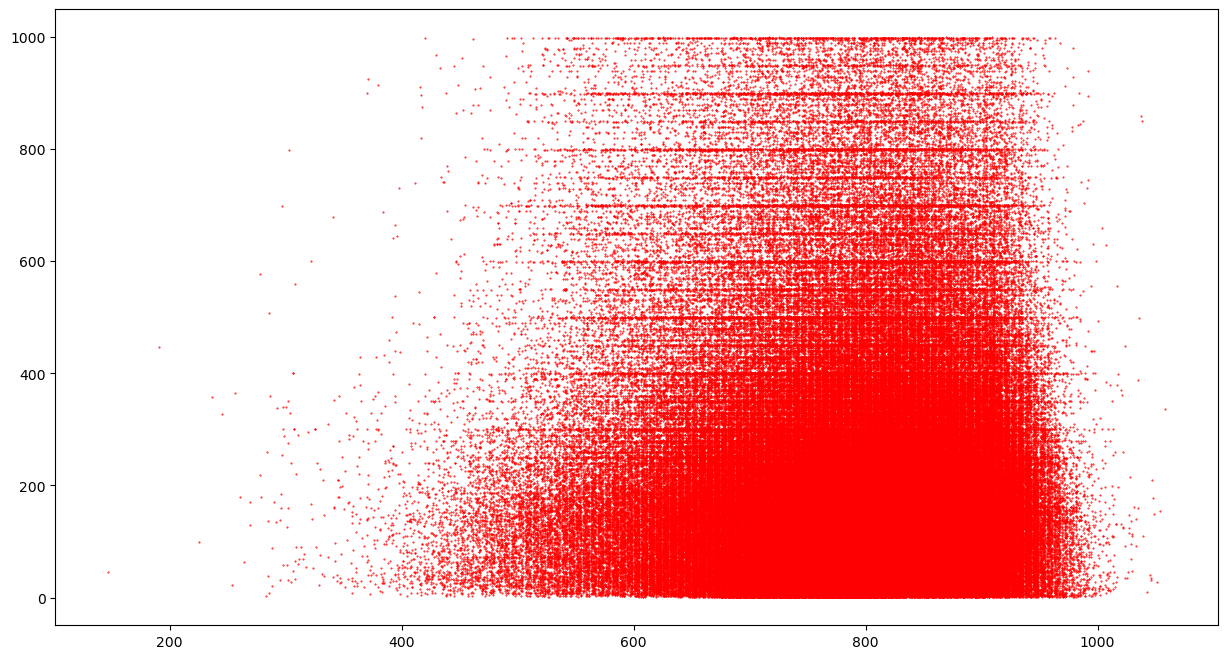

In [87]:
sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color='red')
plt.show()

In [95]:
from myitems import Item
def report(item):
    prompt = item.prompt
    tokens = Item.get_tokenizer().encode(prompt, add_special_tokens=False)
    print(prompt)
    print(tokens[-10:])
    print(Item.get_tokenizer().decode(tokens[-10:]))
          
report(sample[398000])

How much does this cost to the nearest dollar?

Z Line KL2-48 Stainless Steel Wall Mount Range Hood, 48-Inch
From the Wall Mounted Range Hood 3 Speed Touch Sensitive Electronic Controls 3 Layer Aluminum Dishwasher Safe Filters Easy to Install With Everything Included In Stock for Immediate Delivery in Chimney Extensions Available for up to 12 Ceiling This Attractive and Versatile Wall Mounted Range Hood looks and works great in every size Easily Convertible to Ductless by adding the optional Activated Charcoal Filters this unit is easy to install and built for years of trouble free use This Range Hood comes with blower and fan completely installed and factory tested This makes the installation one of the easiest in the industry KL Wall Hood Power 110 v60 Hz Material 430 Brushed Stainless Output 760 cfm Lighting 2 - 25

Price is $849.95
[482, 220, 914, 271, 7117, 374, 400, 26537, 13, 2721]
 - 25

Price is $849.95


In [96]:
random.seed(37)
random.shuffle(sample)
train = sample[:400_000]
test = sample[400_000:402_000]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items.")

Divided into a training set of 400,000 items and test set of 2,000 items.


In [97]:
print(train[0].prompt)


How much does this cost to the nearest dollar?

Quoizel TRG1710BN Trilogy Glass Lantern Semi Flush Mount Ceiling Lighting, 1-Light, 60 Watt, Brushed Nickel (9"H x 10"W)
One Light Semi Flush Mount from the Trilogy collection Item Size Length 10 00 inches Height 9 28 inches Width 10 00 inches Style Transitional Light Type Semi-Flush Mount
TRILOGY SEMI FLUSH MOUNT LIGHT DIMENSIONS 928 High x 10 Wide Weight 29 LBS Ceiling Canopy 5 Dia
MEDIUM BASE LIGHT SOCKET 60 Watt Edison-Type Incandescent Bulb Bulbs Included E26 Socket Compatible with Incandescent CFL Halogen or LED Bulbs Full Range Dimming when used with Dimmable Bulb and Dimmer Switch
INSTALLATION Hardware

Price is $175.99


In [98]:
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

Garage-Pro Rear Bumper Step Pad Set of 2 Compatible with NISSAN Frontier 2005-2018 Upper and Lower Black
Manufactured from high quality materials
Manufactured from high quality materials
Easy to install replaces old or damaged part
Easy to install replaces old or damaged part
This is an OE replacement item
This is an OE replacement item
Garage-Pro
is the most affordable brand for your old worn-out or damaged factory part
This premium quality replacement part is made to give your car truck and SUV that original factory look and performance Available for different applications our Garage-Pro part will surely fit right to your vehicle Comes with 1-year unlimited mileage warranty
Anyone just cant fail by using Garage-Pro
Garage-Pro definitely will indulge you as well as your vehicle starting

Price is $


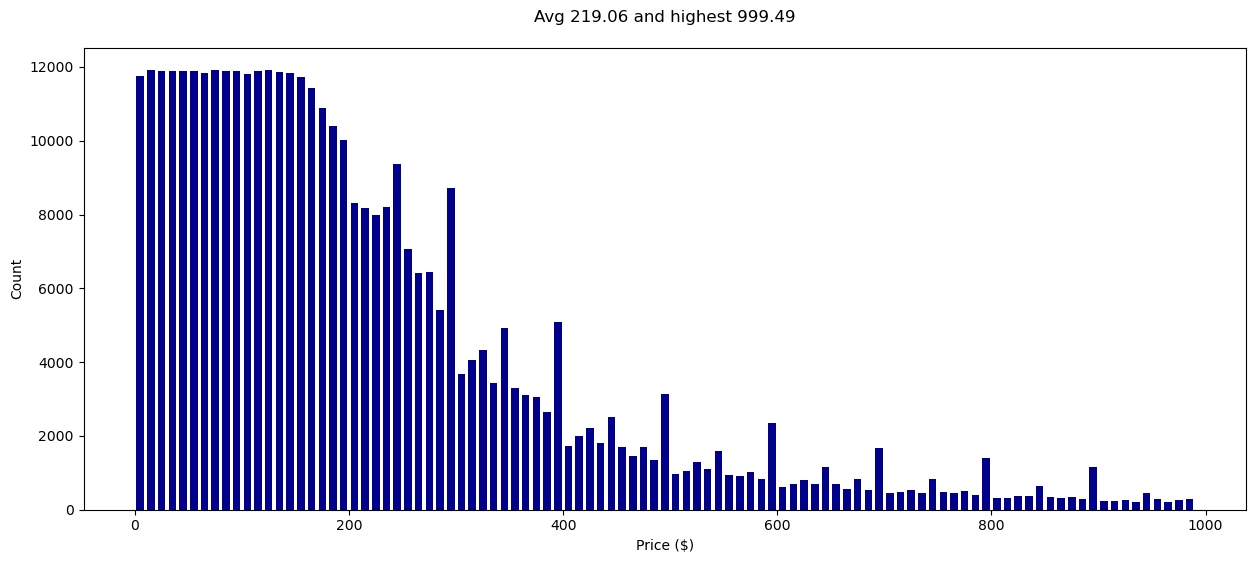

In [101]:
prices = [float(item.price) for item in train]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

In [102]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [115]:
import pickle
from datasets import Dataset, DatasetDict

In [105]:
train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [109]:
!echo $HF_TOKEN

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [113]:
HF_USER = "yuko-37"
DATASET_NAME = f"{HF_USER}/pricer-data"
dataset.push_to_hub(DATASET_NAME, private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/400 [00:00<?, ?ba/s]

Uploading files as a binary IO buffer is not supported by Xet Storage. Falling back to HTTP upload.


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading files as a binary IO buffer is not supported by Xet Storage. Falling back to HTTP upload.


CommitInfo(commit_url='https://huggingface.co/datasets/yuko-37/pricer-data/commit/5cc60fd098a164f85e35f20dfc79038d995315f4', commit_message='Upload dataset', commit_description='', oid='5cc60fd098a164f85e35f20dfc79038d995315f4', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/yuko-37/pricer-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='yuko-37/pricer-data'), pr_revision=None, pr_num=None)

In [116]:
with open('train.pkl', 'wb') as file:
    pickle.dump(train, file)

In [118]:
with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)